### Analysis of MovieLens Data - Part 1

We are provided with the MovieLens data collected by the GroupLens Research Project at the University of Minnesota.
In particular, the data was collected through the MovieLens web site (movielens.umn.edu), which records a number of users' ratings (1-5) towards their watched movies. Besides, simple demographic info (e.g., age and gender) for the users and descriptive info (e.g., title and genre) for the movies are provided. 

Originally, there are several separate files to record the user-movie rating info, user demographic info and movie descriptive info, we have conducted preliminary processing to map and merge the data into one csv file named 'movielens_data.csv'. The header of the csv file is shown below. 

| userId | age | gender | occupation| movieId | rating | genre | timestamp |
    | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | 
    
#### Description of Fields

* __userId__ - the user's id
* __age__ - the user's age
* __gender__ - the user's gender
* __occupation__ - the user's occupation
* __movieId__ - the movie's id
* __rating__ - the user's rating towards the movie
* __genre__ - the genre of the movie
* __timestamp__ - the timestamp indicating when the user rated the movie

Note that, a same user (i.e., a same userId) corresponds to a same age/gender/occupation; a same movie (i.e., a same movieId) corresponds to a same genre; a same user (i.e., a same userId) may rate multiple movies and a same movie (i.e., a same movieId) may receive ratings from multiple users.

### Importing the packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Reading the csv file

In [2]:
df = pd.read_csv('files/movielens_data.csv')

 ### Remove missing data
 
Removed the following records in the csv file: 
 
 * age/gender/rating is missing
 * occupation is set to 'none'

In [3]:
# length of the data before removing the missing data

print(f"Length of dataset before removing missing data: {len(df)}")

Length of dataset before removing missing data: 100000


In [4]:
# removing records which had 'none' as occupation
df1 = df.drop(df.index[(df['occupation'] == 'none')])

# removing null values
data = df1.dropna()

In [5]:
print(f"Length of dataset after removing missing data: {len(data)}")

Length of dataset after removing missing data: 99022


### 'data' is a dataframe without any records having null values or 'none'  in it.
### Length of dataset after removing missing data is *99022*.


----------------------------------

### Descriptive Statistics

With the cleaned data, we will summarize the dataset:

* a. total number of unique users, unique occupations, unique movies, and unique genres
* b. descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records
* c. descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 
* d. descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 


 ### a. total number of unique users, unique occupations, unique movies, and unique genres

In [6]:
unique_users = data['userId'].unique()
unique_occupation = data['occupation'].unique()
unique_movies = data['movieId'].unique()
unique_genre = data['genre'].unique()

print("Total number of unique users:", len(unique_users))
print("Total number of unique occupations:", len(unique_occupation))
print("Total number of unique movies:", len(unique_movies))
print("Total number of unique genres:", len(unique_genre))

Total number of unique users: 934
Total number of unique occupations: 20
Total number of unique movies: 1682
Total number of unique genres: 19


### b. descriptive statistics, e.g., the total number, mean, std, min and max regarding all rating records

In [7]:
data['rating'].describe()

count    99022.000000
mean         3.527792
std          1.125743
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max          5.000000
Name: rating, dtype: float64

### c. descriptive statistics, e.g., mean, std, max, and min of the number of movies rated by each user 

In [8]:
data[['userId', 'rating']].groupby(by='userId').describe()

rating                                             
        count      mean       std  min  25%  50%  75%  max
userId                                                    
1       272.0  3.610294  1.263585  1.0  3.0  4.0  5.0  5.0
2        62.0  3.709677  1.030472  1.0  3.0  4.0  4.0  5.0
3        54.0  2.796296  1.219026  1.0  2.0  3.0  4.0  5.0
4        24.0  4.333333  0.916831  2.0  4.0  5.0  5.0  5.0
5       170.0  2.894118  1.363285  1.0  2.0  3.0  4.0  5.0
...       ...       ...       ...  ...  ...  ...  ...  ...
939      49.0  4.265306  0.974156  2.0  4.0  5.0  5.0  5.0
940     107.0  3.457944  1.012007  1.0  3.0  4.0  4.0  5.0
941      22.0  4.045455  0.898532  2.0  4.0  4.0  5.0  5.0
942      79.0  4.265823  0.763072  2.0  4.0  4.0  5.0  5.0
943     168.0  3.410714  1.258886  1.0  2.0  4.0  4.0  5.0

[934 rows x 8 columns]

### The rating/count column shows the number of movies rated by each user.

In [9]:
user_ratings = data.groupby(['userId'])['userId'].count()
user_ratings.describe()

count    934.000000
mean     106.019272
std      100.793963
min       19.000000
25%       33.000000
50%       65.000000
75%      148.000000
max      736.000000
Name: userId, dtype: float64

### Other descriptive stats are -
* #### Mean = 106.019272
* #### Std. = 100.793963
* #### MAX  = 736.000000
* #### MIN  = 19.000000

### d. descriptive statistics, e.g., mean, std, max, min of the number of ratings that received by each movie 

In [10]:
data[['movieId', 'rating']].groupby(by='movieId').describe()

rating                                             
         count      mean       std  min  25%  50%  75%  max
movieId                                                    
1        445.0  3.876404  0.927802  1.0  3.0  4.0  5.0  5.0
2        129.0  3.186047  0.958249  1.0  3.0  3.0  4.0  5.0
3         88.0  3.034091  1.188536  1.0  2.0  3.0  4.0  5.0
4        206.0  3.543689  0.955362  1.0  3.0  4.0  4.0  5.0
5         84.0  3.273810  0.935913  1.0  3.0  3.0  4.0  5.0
...        ...       ...       ...  ...  ...  ...  ...  ...
1678       1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
1679       1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0
1680       1.0  2.000000       NaN  2.0  2.0  2.0  2.0  2.0
1681       1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0
1682       1.0  3.000000       NaN  3.0  3.0  3.0  3.0  3.0

[1682 rows x 8 columns]

### The rating/count column shows the number of ratings received by each movie.

In [11]:
movies_ratings = data.groupby(['movieId'])['movieId'].count()
movies_ratings.describe()

count    1682.000000
mean       58.871581
std        79.629796
min         1.000000
25%         6.000000
50%        26.000000
75%        79.000000
max       578.000000
Name: movieId, dtype: float64

### Other descriptive stats are -
* #### Mean = 58.871581
* #### Std. = 79.629796
* #### MAX  = 578.000000
* #### MIN  = 1.000000

 ----------------------------------


### Plotting and Analysis

We will try to explore the correlation between gender/occupation/genre and ratings; for instance, do female/male users tend to provide higher ratings than male/female users? 

### Gender vs Ratings

<AxesSubplot:title={'center':'Boxplot to learn about correlation between Gender and Ratings'}, xlabel='gender', ylabel='rating'>

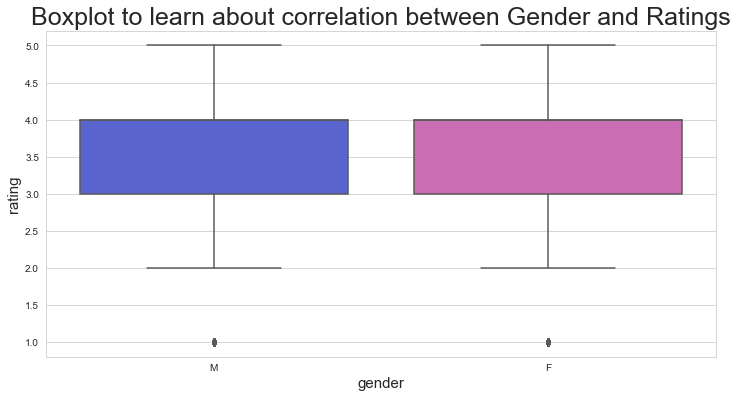

In [12]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
male_female_colors = ['#4554E3',  # Male
                      '#DC5EBC'  # Female
                      ]
plt.title("Boxplot to learn about correlation between Gender and Ratings", size=25)
plt.xlabel('gender', size=15)
plt.ylabel('rating', size=15)
sns.boxplot(x='gender', y='rating', data=data, palette=male_female_colors)

#### The range, minimum and maximum values of both the males and the females appear to be same, hence, suggesting that there is no correlation between gender and ratings.

### Occupations vs Ratings

<AxesSubplot:title={'center':'Boxplot to learn about correlation between Occupations and Ratings'}, xlabel='occupation', ylabel='rating'>

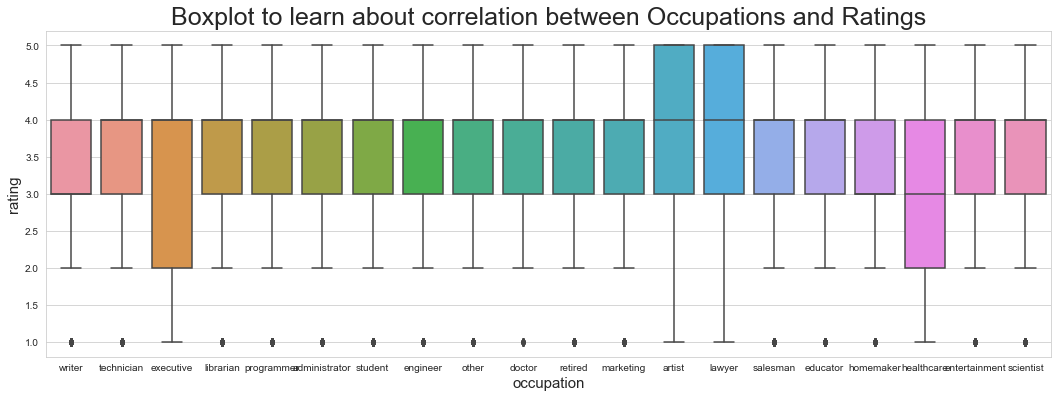

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize=(18,6))
plt.title("Boxplot to learn about correlation between Occupations and Ratings", size=25)
plt.xlabel('occupation', size=15)
plt.ylabel('rating', size=15)
sns.boxplot(x='occupation', y='rating', data=data)

#### The minimum and maximum values of ratings by people who are executive, artist, lawyer and in healthcare tends to be different than the people having majority of other occupations. Going off the majority, it suggests that there is no correlation between occupation and ratings.

### Genre vs Ratings

<AxesSubplot:title={'center':'Boxplot to learn about correlation between Genre and Ratings'}, xlabel='genre', ylabel='rating'>

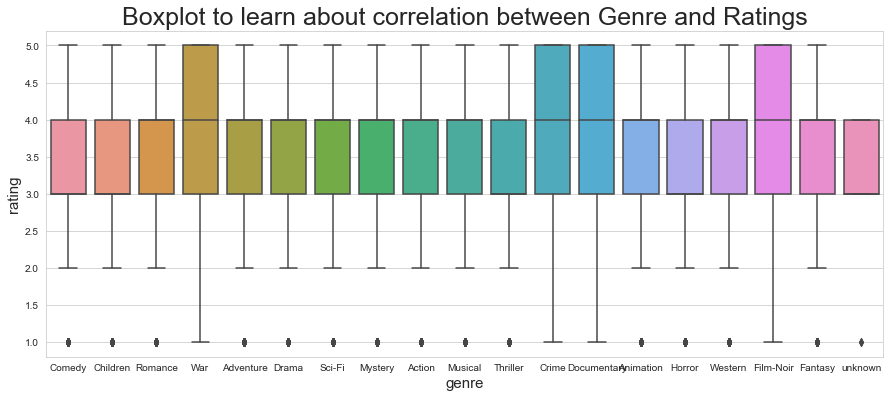

In [14]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
plt.title("Boxplot to learn about correlation between Genre and Ratings", size=25)
plt.xlabel('genre', size=15)
plt.ylabel('rating', size=15)
sns.boxplot(x='genre', y='rating', data=data)

#### The minimum and maximum values of ratings for war, crime, documentary, film-noir and some unknown genre tends to be different than the majority of other genres. Going off the majority, it suggests that there is no correlation between occupation and ratings.
#### It also shows that movies of genre - war, crime, documentary and film-noir have more ratings in 4.0-5.0 mark than others.
----------------------------------

### Detecting and removing outliers

We may define outlier users and movies with three rules, because the dataset can be biased with these users:

* users whose age is no more than 10
* users who rate less than 20 movies
* movies that receives less than 10 ratings (i.e., movies that are rated by less than 10 users)
 

In [15]:
# Removing users who are less than 10 years of age. 

data_abv10 = data.drop(data.index[data['age']<=10.0])
data_abv10

# 'data_abv10' represent the dataframe of people aged more than 10.

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467
...,...,...,...,...,...,...,...,...
99995,880,13.0,M,student,476,3.0,Comedy,880175444
99996,716,36.0,F,administrator,204,5.0,Sci-Fi,879795543
99997,276,21.0,M,student,1090,1.0,Thriller,874795795
99998,13,47.0,M,educator,225,2.0,Comedy,882399156


In [16]:
# Removing users who rate less than 20 movies

data_no20 = data_abv10.drop(data_abv10.index[data_abv10.userId.isin(user_ratings[user_ratings<20].index)])
data_no20

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467
...,...,...,...,...,...,...,...,...
99995,880,13.0,M,student,476,3.0,Comedy,880175444
99996,716,36.0,F,administrator,204,5.0,Sci-Fi,879795543
99997,276,21.0,M,student,1090,1.0,Thriller,874795795
99998,13,47.0,M,educator,225,2.0,Comedy,882399156


In [17]:
#Removing the movies which recieved less than 10 ratings

clean_data = data_no20.drop(data_no20.index[data_no20.movieId.isin(movies_ratings[movies_ratings<10].index)])
clean_data

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
2,22,25.0,M,writer,377,1.0,Children,878887116
3,244,28.0,M,technician,51,2.0,Romance,880606923
5,298,44.0,M,executive,474,4.0,War,884182806
7,253,26.0,F,librarian,465,5.0,Adventure,891628467
...,...,...,...,...,...,...,...,...
99995,880,13.0,M,student,476,3.0,Comedy,880175444
99996,716,36.0,F,administrator,204,5.0,Sci-Fi,879795543
99997,276,21.0,M,student,1090,1.0,Thriller,874795795
99998,13,47.0,M,educator,225,2.0,Comedy,882399156


In [18]:
print(f"Length of dataset after removing outliers: {len(clean_data)}")

Length of dataset after removing outliers: 96854


## Length of dataset after removing outliers - *96854*


----------

### Converting the cleaned dataset to a csv file.

In [19]:
clean_data.to_csv('movielens_data_clean.csv', index=False)

---